In [1]:
library(clusterProfiler)
library(enrichplot)
library(fgsea)

# we use ggplot2 to add x axis labels (ex: ridgeplot)
library(ggplot2)
organism = "org.Dm.eg.db"
library(organism, character.only = TRUE)




Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
 

In [19]:
df = read.csv("t100_genes_per_metaprogram_6_MP.csv", header=TRUE)


In [21]:
pathways.hallmark <- gmtPathways("h.all.v7.4.symbols.gmt")

genes <- as.vector(as.list(df["MP_0"])$MP_0)


In [22]:
result_fgsea = fgseaSimple(pathways.hallmark,stats= genes ,
                     minSize=-1,maxSize=Inf,scoreType="pos",nperm=1000)


ERROR: Error in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, : stats should be named


In [23]:
as.vector(as.list(df["MP_0"])$MP_0)

[1] "MALAT1"     "RBMS3"      "AUTS2"      "FP236383.3" "MBNL1"     
  [6] "PTPRG"      "LRMDA"      "NEAT1"      "MIR99AHG"   "TENM3"     
 [11] "COL1A2"     "SDK1"       "TTC28"      "KAZN"       "GPC6"      
 [16] "FP671120.4" "DST"        "FNDC3B"     "FTX"        "RAD51B"    
 [21] "ARID1B"     "ZBTB20"     "RUNX1T1"    "STK3"       "FOXP1"     
 [26] "STAG1"      "JMJD1C"     "NRXN3"      "TCF12"      "EXOC4"     
 [31] "LRFN5"      "CBLB"       "IMMP2L"     "AFF3"       "LPP"       
 [36] "FOXN3"      "VPS13B"     "FHIT"       "ADGRL3"     "LINC02476" 
 [41] "GSE1"       "PDE10A"     "HMGA2"      "LSAMP"      "STXBP5"    
 [46] "SPIDR"      "DPYD"       "AC011246.1" "UTRN"       "CDH11"     
 [51] "EFNA5"      "FARP1"      "TBC1D5"     "REV3L"      "NTRK2"     
 [56] "AKAP13"     "SGCD"       "ARHGAP26"   "KMT2C"      "RUNX1"     
 [61] "PTK2"       "ROR2"       "EGFR"       "MAML2"      "RORA"      
 [66] "FMNL2"      "APP"        "SFRP1"      "HNRNPA2B1"  "PID1"      
 [71] "PCDH9"      "EXT1"       "VCAN"       "DOCK4"      "MEIS1"     
 [76] "RERE"       "NCOA2"      "ADAMTS9"    "MACF1"      "PRDM1"     
 [81] "GPHN"       "PDE4D"      "PLCB1"      "MAP2"       "ZFHX3"     
 [86] "PVT1"       "SORCS2"     "SEMA5A"     "HIPK2"      "ZEB2"      
 [91] "SSBP3"      "DCC"        "PIEZO2"     "EBF1"       "GRM7"      
 [96] "CNTN4"      "MAGI1"      "CDH13"      "PDZRN4"     "NEGR1"

In [24]:
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1
 



Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 30 10

[1] 1134   10

[1] 1164   10

In [25]:
ggp<- df %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes")) +xlab("qscore") + ylab("Description")
pdf(paste0(mp,"_", cohort,"_Enrichment_",enrichdbs,"_",topn,"_v1.pdf"), width = 10, height = 10)
print(myggp)
dev.off()



ERROR: [1m[33mError[39m in `geom_bar()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error in `FUN()`:[22m
[33m![39m object 'qscore' not found


In [26]:
h_mut_enr

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR,2.1188752
2,Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11,2.1188752
3,Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2,2.1145387
4,Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST,0.9907726
5,G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5,0.9907726
6,Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5,0.9907726
7,Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2,0.7154718
8,Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR,0.7154718
9,Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13,0.7154718


In [27]:
enriched <- enrichr(genes, dbs)
enriched

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR
Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11
Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2
Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST
G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5
Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5
Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2
Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR
Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13


In [28]:
#df = df[["MP4" , "MP2", "MP1", "MP3", "MP5", "MP6"]]
#df.columns = ["MP1",  "MP2", "MP3", "MP4", "MP5", "MP6"]


In [29]:
colnames(df) <- c("MP3", "MP2", "MP4", "MP1", "MP5", "MP6", "MP7")
df

MP3,MP2,MP4,MP1,MP5,MP6,MP7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MALAT1,MALAT1,MALAT1,MALAT1,MALAT1,FP236383.3,MALAT1
RBMS3,NEAT1,NEAT1,PTPRC,FN1,FP671120.4,NEAT1
AUTS2,LRMDA,FP236383.3,MBNL1,COL3A1,COL1A2,FP236383.3
FP236383.3,PLXDC2,ZBTB20,ARHGAP15,COL1A2,COL1A1,CD74
MBNL1,DPYD,QKI,PRKCH,FP236383.3,COL6A2,ZEB2
PTPRG,DOCK4,XIST,RABGAP1L,COL6A3,VIM,SAT1
LRMDA,CHST11,FNDC3B,CBLB,COL1A1,ACTB,LRMDA
NEAT1,ZEB2,PPP2R2B,SKAP1,EXT1,EEF1A1,PLXDC2
MIR99AHG,AKAP13,PDE4B,PARP8,GPC6,COL6A1,DPYD


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying GO_Biological_Process_2021... Done.
Parsing results... Done.


[1] 29 10

[1] 1026   10

[1] 1055   10

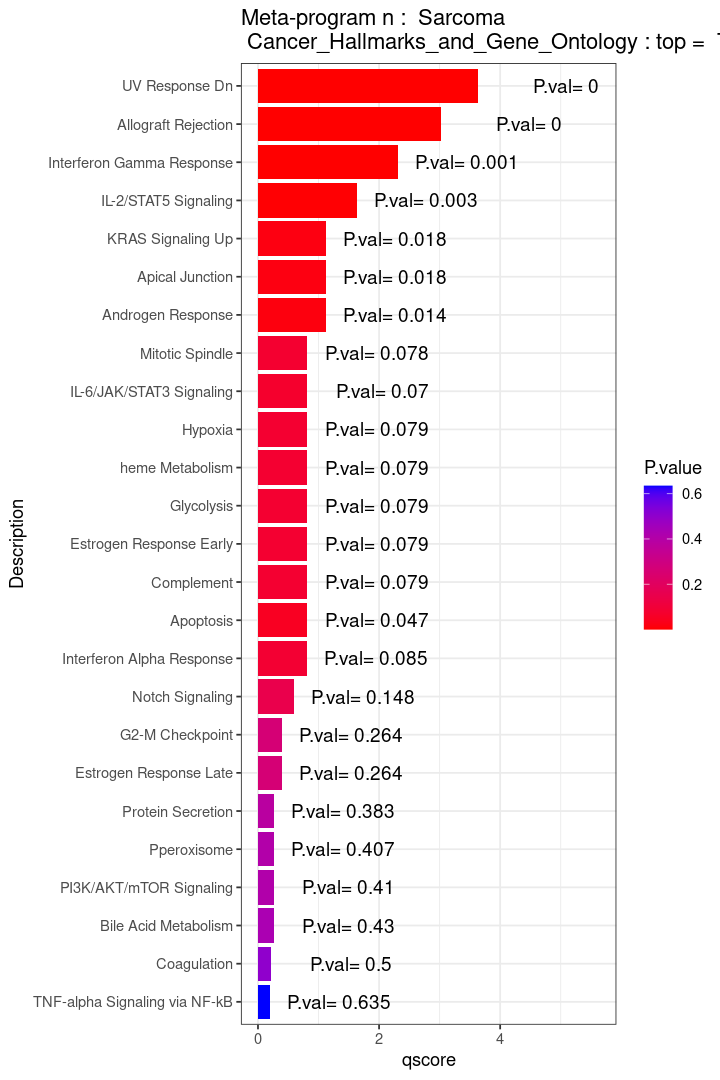

In [43]:
samp = "MP1"
genes <- as.vector(as.list(df[[samp]]))


library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)



# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
dbs <- c("MSigDB_Hallmark_2020","GO_Biological_Process_2021")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr <- h_mut_enr1

ggp<- h_mut_enr %>%
  ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
  scale_fill_gradient(low = "red", high = "blue") +
  geom_bar(stat = "identity") +
  theme(legend.position = "bottom",
        axis.title.y = element_blank()
  ) +
  geom_text(
    aes(label = paste("P.val=", round(P.value,3))),
    color = "black",
    size = 4,
    hjust = 1, nudge_x = 2
  ) + theme_bw()
myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+
                              ggtitle(paste(mp,": ",cohort,"\n",enrichdbs,": top = ",topn,"_genes"))+
                              xlab("qscore") + ylab("Description")
print(myggp)
#pdf(paste0(mp,"_", cohort,"_Enrichment_",enrichdbs,"_",topn,"_v1_", samp, "_6_clusters.pdf"), width = 10, height = 10)
#print(myggp)
#dev.off()



In [41]:
h_mut_enr

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,UV Response Dn,7/144,7.933922e-06,0.0002300837,0,0,10.857939,127.5195773,INPP4B;ATXN1;SIPA1L1;CELF2;RASA2;FYN;RUNX1,3.6381141
2,Allograft Rejection,7/200,6.570538e-05,0.0009527280,0,0,7.685609,74.0149514,CD96;FYB1;PTPRC;STAT4;HLA-A;ETS1;B2M,3.0210311
3,Interferon Gamma Response,6/200,5.070298e-04,0.0049012883,0,0,6.483659,49.1911342,RNF213;HLA-B;STAT4;TXNIP;HLA-A;B2M,2.3096897
4,IL-2/STAT5 Signaling,5/199,3.253401e-03,0.0235871604,0,0,5.346175,30.6231787,RABGAP1L;PRKCH;BCL2;CD44;CDC42SE2,1.6273243
5,Androgen Response,3/100,1.382176e-02,0.0748751917,0,0,6.314061,27.0337234,INPP4B;IQGAP2;B2M,1.1256621
6,Apical Junction,4/200,1.807332e-02,0.0748751917,0,0,4.188776,16.8108896,FYB1;PTPRC;EXOC4;ACTB,1.1256621
7,KRAS Signaling Up,4/200,1.807332e-02,0.0748751917,0,0,4.188776,16.8108896,RABGAP1L;IKZF1;DOCK2;ETS1,1.1256621
8,Apoptosis,3/161,4.700945e-02,0.1525567108,0,0,3.864413,11.8150830,DPYD;TXNIP;CD44,0.8165687
9,IL-6/JAK/STAT3 Signaling,2/87,7.042428e-02,0.1525567108,0,0,4.757503,12.6226890,ITGA4;CD44,0.8165687


In [48]:
df

MP3,MP2,MP4,MP1,MP5,MP6,MP7
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MALAT1,MALAT1,MALAT1,MALAT1,MALAT1,FP236383.3,MALAT1
RBMS3,NEAT1,NEAT1,PTPRC,FN1,FP671120.4,NEAT1
AUTS2,LRMDA,FP236383.3,MBNL1,COL3A1,COL1A2,FP236383.3
FP236383.3,PLXDC2,ZBTB20,ARHGAP15,COL1A2,COL1A1,CD74
MBNL1,DPYD,QKI,PRKCH,FP236383.3,COL6A2,ZEB2
PTPRG,DOCK4,XIST,RABGAP1L,COL6A3,VIM,SAT1
LRMDA,CHST11,FNDC3B,CBLB,COL1A1,ACTB,LRMDA
NEAT1,ZEB2,PPP2R2B,SKAP1,EXT1,EEF1A1,PLXDC2
MIR99AHG,AKAP13,PDE4B,PARP8,GPC6,COL6A1,DPYD


In [103]:
clone_db<-list()
for (clone in colnames(df)[1:6]){
    
    genes = print(df[[clone]])
    print(genes[1:10])
    dbs <- c("MSigDB_Hallmark_2020")
    mut_enr_ch<-mutate(enrichr(df[[clone]], dbs)[[1]], qscore = -log(Adjusted.P.value, base=10))
    mut_enr <- rbind.data.frame(mut_enr_ch)
    mut_enr$clone <- clone
    Sys.sleep(3)

    clone_db <- append(clone_db, list(mut_enr[1:25,]))


}


  [1] "MALAT1"     "RBMS3"      "AUTS2"      "FP236383.3" "MBNL1"     
  [6] "PTPRG"      "LRMDA"      "NEAT1"      "MIR99AHG"   "TENM3"     
 [11] "COL1A2"     "SDK1"       "TTC28"      "KAZN"       "GPC6"      
 [16] "FP671120.4" "DST"        "FNDC3B"     "FTX"        "RAD51B"    
 [21] "ARID1B"     "ZBTB20"     "RUNX1T1"    "STK3"       "FOXP1"     
 [26] "STAG1"      "JMJD1C"     "NRXN3"      "TCF12"      "EXOC4"     
 [31] "LRFN5"      "CBLB"       "IMMP2L"     "AFF3"       "LPP"       
 [36] "FOXN3"      "VPS13B"     "FHIT"       "ADGRL3"     "LINC02476" 
 [41] "GSE1"       "PDE10A"     "HMGA2"      "LSAMP"      "STXBP5"    
 [46] "SPIDR"      "DPYD"       "AC011246.1" "UTRN"       "CDH11"     
 [51] "EFNA5"      "FARP1"      "TBC1D5"     "REV3L"      "NTRK2"     
 [56] "AKAP13"     "SGCD"       "ARHGAP26"   "KMT2C"      "RUNX1"     
 [61] "PTK2"       "ROR2"       "EGFR"       "MAML2"      "RORA"      
 [66] "FMNL2"      "APP"        "SFRP1"      "HNRNPA2B1"  "PID1"      
 [71] 

In [104]:
genes

[1] "FP236383.3" "FP671120.4" "COL1A2"     "COL1A1"     "COL6A2"    
  [6] "VIM"        "ACTB"       "EEF1A1"     "COL6A1"     "COL5A1"    
 [11] "FN1"        "MALAT1"     "B2M"        "EEF2"       "HLA-B"     
 [16] "GSN"        "CFD"        "FSTL1"      "HLA-A"      "TIMP2"     
 [21] "HNRNPA2B1"  "MYH9"       "COL7A1"     "APP"        "COL3A1"    
 [26] "H3F3B"      "FTH1"       "SRRM2"      "HSP90AA1"   "COL6A3"    
 [31] "AHNAK"      "S100A6"     "DYNC1H1"    "MT2A"       "COL4A1"    
 [36] "TPM4"       "S100A11"    "NORAD"      "FLNA"       "CANX"      
 [41] "HLA-C"      "VCAN"       "TUBB"       "FGFR1"      "CALD1"     
 [46] "DST"        "ACTG1"      "NEAT1"      "HSP90AB1"   "PPIA"      
 [51] "CST3"       "MFAP4"      "S100A10"    "MMP2"       "LMNA"      
 [56] "CCDC80"     "TXNIP"      "MAP1B"      "MACF1"      "COL4A2"    
 [61] "TAGLN2"     "FTL"        "SFRP1"      "FBLN2"      "TIMP3"     
 [66] "FBLN1"      "FBN1"       "IFITM3"     "PFN1"       "PMP22"     
 [71] "IGF2"       "TUBA1B"     "ADAMTS2"    "ABI3BP"     "GSE1"      
 [76] "IGFBP7"     "NFIC"       "SDK1"       "LRP1"       "SPTBN1"    
 [81] "LAPTM4A"    "UAP1"       "PRKDC"      "RRBP1"      "ADAR"      
 [86] "INHBA"      "ITGB1"      "PSAP"       "H19"        "NCOR2"     
 [91] "C1S"        "NUPR1"      "FAM20C"     "DCN"        "HSPB1"     
 [96] "AGAP1"      "SPARC"      "PRRC2C"     "TMSB10"     "ANKRD11"

In [105]:
clone_db

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore,clone
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR,2.1188752,MP3
2,Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11,2.1188752,MP3
3,Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2,2.1145387,MP3
4,Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST,0.9907726,MP3
5,G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5,0.9907726,MP3
6,Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5,0.9907726,MP3
7,Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2,0.7154718,MP3
8,Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR,0.7154718,MP3
9,Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13,0.7154718,MP3


In [106]:
clone_db

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore,clone
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR,2.1188752,MP3
2,Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11,2.1188752,MP3
3,Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2,2.1145387,MP3
4,Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST,0.9907726,MP3
5,G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5,0.9907726,MP3
6,Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5,0.9907726,MP3
7,Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2,0.7154718,MP3
8,Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR,0.7154718,MP3
9,Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13,0.7154718,MP3


In [107]:
get_first_15_rownames <- function(df) {
  return((df$Term)[1:20])
}

# Apply the function to each dataframe in df_list and create a new list
first_15_rownames_list <- lapply(clone_db, get_first_15_rownames)

all_row_names <- unique(unlist(first_15_rownames_list))
length(all_row_names)
clone_db

[1] 38

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore,clone
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR,2.1188752,MP3
2,Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11,2.1188752,MP3
3,Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2,2.1145387,MP3
4,Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST,0.9907726,MP3
5,G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5,0.9907726,MP3
6,Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5,0.9907726,MP3
7,Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2,0.7154718,MP3
8,Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR,0.7154718,MP3
9,Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13,0.7154718,MP3


In [108]:
combined_df

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore,log_pvalue
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Apical Junction,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,VCAN;NEGR1;CDH11;EXOC4;PTK2;EGFR,2.1188752,3.2949665
Epithelial Mesenchymal Transition,6/200,0.0005070298,0.007605447,0,0,6.483659,49.1911342,SFRP1;VCAN;COL1A2;SGCD;DST;CDH11,2.1188752,3.2949665
Angiogenesis,3/36,0.0007681770,0.007681770,0,0,18.619494,133.5295207,APP;VCAN;PTK2,2.1145387,3.1145387
Mitotic Spindle,4/199,0.0177783316,0.102147419,0,0,4.210470,16.9672466,AKAP13;FARP1;DOCK4;DST,0.9907726,1.7501090
G2-M Checkpoint,4/200,0.0180733221,0.102147419,0,0,4.188776,16.8108896,STAG1;MEIS1;FOXN3;EFNA5,0.9907726,1.7429620
Apical Surface,2/44,0.0204294839,0.102147419,0,0,9.649174,37.5427757,APP;EFNA5,0.9907726,1.6897426
Apoptosis,3/161,0.0470094530,0.192543185,0,0,3.864413,11.8150830,APP;DPYD;PTK2,0.7154718,1.3278148
Hypoxia,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,EXT1;RORA;EGFR,0.7154718,1.1028754
Myogenesis,3/200,0.0789086435,0.192543185,0,0,3.093254,7.8552100,APP;SGCD;CDH13,0.7154718,1.1028754


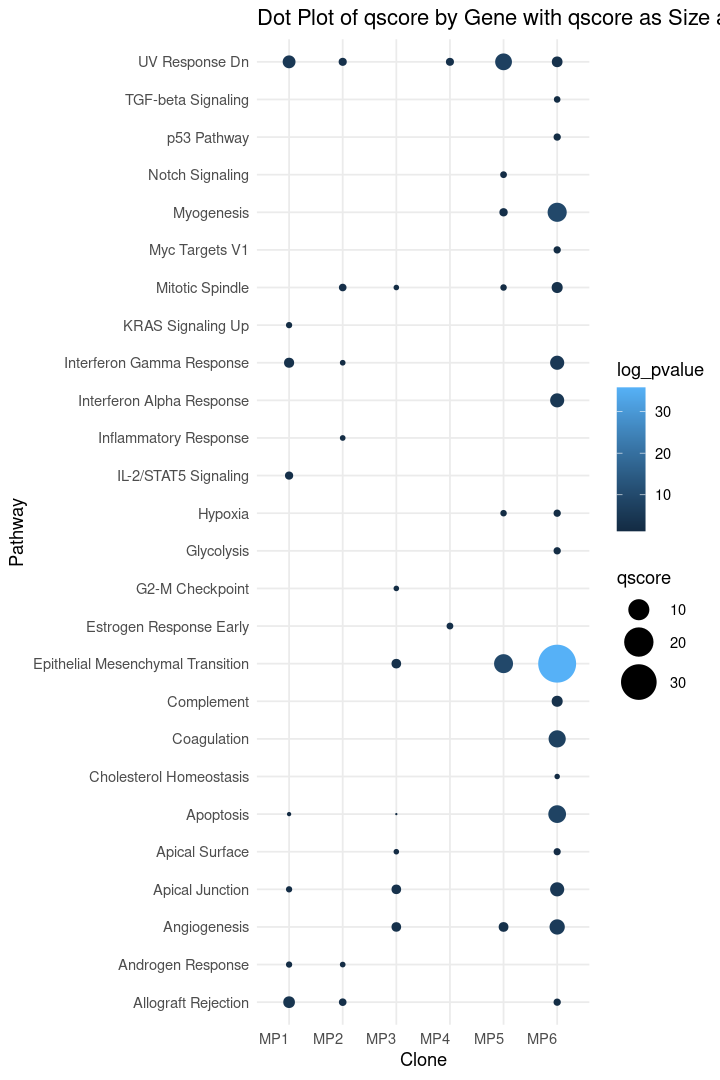

In [110]:
library(tidyverse)

combined_df <- do.call(rbind, clone_db)

# Filter the dataframe to include only rows where term exists in all_terms
combined_df <- combined_df %>%
  filter(Term %in% all_row_names)

combined_df['log_pvalue'] <- -log10(combined_df$P.value)


p_values <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = P.value, 
                         id_cols = clone)

q_scores <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = qscore, 
                         values_fill = 0,
                         id_cols = clone)



options(repr.plot.width=6, repr.plot.height=9)


fake_data <- data.frame(q_scores)

combined_df %>%
  filter(log_pvalue > 1.2) %>%
  ggplot() +
  geom_point(aes(x = factor(clone), y =  Term, size = qscore, color =  log_pvalue)) +
  scale_size_continuous(range = c(0, 10)) +
  labs(x = "Clone", y = "Pathway", title = "Dot Plot of qscore by Gene with qscore as Size and Color") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1))  # Rotates x-axis labels for better visibility


In [10]:
df <- read.csv("t100_genes_per_metaprogram.csv", header=TRUE)
c_H_matrix <- c("Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv",
                     "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv",
                     "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv")

In [11]:
as.list(df["MP_0"])$MP_0

[1] "MALAT1"     "FP236383.3" "NEAT1"      "FP671120.4" "LRMDA"     
  [6] "MBNL1"      "TENM3"      "LSAMP"      "RBMS3"      "QKI"       
 [11] "FMNL2"      "EXOC4"      "TCF12"      "VPS13B"     "DST"       
 [16] "AUTS2"      "FNDC3B"     "LRFN5"      "STK3"       "AFF3"      
 [21] "FHIT"       "TBC1D5"     "PRDM1"      "ADGRL3"     "NRXN3"     
 [26] "ZFAND3"     "DOCK4"      "SPIDR"      "ARHGAP26"   "FTX"       
 [31] "ARID1B"     "DENND5B"    "STXBP5"     "HIPK2"      "SFMBT2"    
 [36] "MACF1"      "CDH11"      "ZEB2"       "EXT1"       "MSI2"      
 [41] "HNRNPA2B1"  "SGCD"       "TBL1XR1"    "PTK2"       "JMJD1C"    
 [46] "NTRK2"      "SLC8A1"     "AC092691.1" "COL1A2"     "TCF4"      
 [51] "MIR99AHG"   "DPYD"       "SFRP1"      "ROR2"       "AKAP13"    
 [56] "AGAP1"      "PID1"       "SEMA5A"     "HMGA2"      "WWOX"      
 [61] "GSE1"       "MEIS1"      "PTPRG"      "STAG1"      "DCC"       
 [66] "SRRM2"      "PDZRN4"     "MAP2"       "TTC28"      "ZBTB20"    
 [71] "UTRN"       "ADAMTS9"    "BIRC6"      "GRM7"       "RAD51B"    
 [76] "AC011246.1" "FBXL7"      "LDLRAD4"    "PDE4B"      "ZFHX3"     
 [81] "PLCB1"      "SORCS2"     "FARP1"      "SSBP3"      "RUNX1T1"   
 [86] "ANKRD11"    "KAZN"       "PDE10A"     "EGFR"       "PIEZO2"    
 [91] "CDK14"      "ELMO1"      "SDK1"       "SIM2"       "HERC1"     
 [96] "MED13L"     "RERE"       "APP"        "REV3L"      "MFGE8"

In [12]:
read.csv(c_H_matrix[1])

X,ATCGAGTGTGCTTCTC.1,TCTGAGACAATCCAAC.1,GCATGATAGTGACTCT.1,GAACCTAGTTTCCACC.1,CATCAGAAGCTTTGGT.1,GTTCGGGCACAGACAG.1,CATGCCTTCCAAATGC.1,GACAGAGTCGGATGTT.1,GCTGCAGAGGGATACC.1,⋯,TCAATCTTCCTTTACA.1,CTGAAGTTCTGTTTGT.1,CCCAATCAGCAATCTC.1,ACATGGTGTCTCTCGT.1,AACTCCCAGTACGCCC.1,CCATTCGAGGTGATAT.1,GCGCAGTTCCCATTTA.1,CATATGGAGCAAATCA.1,CCTACCAAGAAAGTGG.1,CGTGTAAAGTGGTAGC.1
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.755924e-02,0.021986261,2.868441e-03,4.054529e-02,1.652339e-02,1.389712e-02,0.0333501032,2.828559e-02,3.161981e-02,⋯,2.220446e-16,2.741052e-03,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
2,4.701602e-05,0.001558362,2.331386e-03,2.284279e-05,1.504292e-04,7.000346e-04,0.0002124620,2.220446e-16,1.027353e-03,⋯,1.165977e-02,1.359481e-03,1.239968e-02,1.178069e-02,1.180814e-02,1.243517e-02,1.305221e-02,1.245533e-02,1.159849e-02,1.246397e-02
3,2.220446e-16,0.003977754,2.220446e-16,1.116958e-04,2.220446e-16,8.577296e-06,0.0003830021,3.368273e-04,9.596452e-15,⋯,2.220446e-16,1.421311e-02,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,7.027027e-04,1.283928e-03,2.220446e-16
4,1.383223e-02,0.015086704,2.559147e-02,9.228321e-03,1.992433e-02,2.162493e-02,0.0114412350,1.418037e-02,1.045214e-02,⋯,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16


ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: !which python
           ^
